## Time Series Analysis

### Description:

This notebook aims to analyse each of the Time Series that are used in this project.

Instead of doing descriptive analysis in each of the notebooks, they will all be done here, even though we wont export the information gathered directly for other notebooks. 

With that being said, this should be the first notebook to be executed and analysed, since all the other ones, which will focus mainly on the methods for modeling and forecasting will assume informations that are discovered here, such as the existence of missing values, stationarity, ACF and PACF functions, seasonality and more.

Other notebooks may, and most probably will, implement some functions to deal with parts of that analysis, but they won't be as clear and exposed as it is found in this notebook.

### Packages Needed

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

## Some Useful Functions

In [6]:
# Filtering the data as well as handle missing values
def filterData(df,index,value):
    series = df.loc[:,[index,value]]
    series.set_index(index,inplace=True)
    series.index=pd.to_datetime(series.index)
    series = series.asfreq('d')
    series = series.interpolate()
    return series

#Ploting a single time series
def plot_series(serie,title,xlabel,ylabel):
    fig = plt.figure()
    plt.plot(serie)
    plt.title(title, fontsize=20)
    plt.xlabel(xlabel, fontsize=18)
    plt.ylabel(ylabel, fontsize=18)
    plt.show()
    

## Reading the Data

In [7]:
USD_BRL_df = pd.read_csv('../data/BRL=X.csv')
USD_CAD_df = pd.read_csv('../data/CAD=X.csv')
AmericanAirlines_df = pd.read_csv('../data/AAL2010_2019.csv')

print('American',AmericanAirlines_df.head())
print('USD/BRL',USD_BRL_df.head())
print('USB/CAD',USD_CAD_df.head())

American          Date  Open  High   Low  Close  Adj Close    Volume
0  2010-01-01  4.84  5.43  4.66   5.24   4.939965  65680600
1  2010-01-08  5.27  5.71  4.94   5.59   5.269927  60750800
2  2010-01-15  5.64  5.96  5.42   5.46   5.147369  47723100
3  2010-01-22  5.48  5.52  4.47   5.14   4.845691  69231800
4  2010-01-29  5.23  6.00  5.17   5.49   5.175651  65152000
USD/BRL          Date    Open    High     Low   Close  Adj Close  Volume
0  2010-01-01  1.6930  1.7472  1.6713  1.7389     1.7389       0
1  2010-01-08  1.6954  1.7698  1.6765  1.7641     1.7641       0
2  2010-01-15  1.7085  1.8032  1.7085  1.8008     1.8008       0
3  2010-01-22  1.7525  1.8712  1.7525  1.8680     1.8680       0
4  2010-01-29  1.8200  1.8952  1.7797  1.8804     1.8804       0
USB/CAD          Date    Open    High     Low   Close  Adj Close  Volume
0  2010-01-01  1.0517  1.0530  1.0290  1.0340     1.0340       0
1  2010-01-08  1.0338  1.0412  1.0223  1.0234     1.0234       0
2  2010-01-15  1.0235  1.0522 

## Filtering the dataframes

We want only the *Date*, which will be our index, and *Adj Close*, which is the actual "variable" we want to model and predict.

In [8]:
#Something is odd with the frequency. Our series are weekly, but when freq='w' we get all NaN

USD_CAD_serie = filterData(USD_CAD_df,'Date','Adj Close')
USD_BRL_serie = filterData(USD_BRL_df,'Date','Adj Close')
AmericanAirlines_serie = filterData(AmericanAirlines_df,'Date','Adj Close')

print('American',AmericanAirlines_serie.head())
print('USD/BRL',USD_BRL_serie.head())
print('USD/CAD',USD_CAD_serie.head())

American             Adj Close
Date                 
2010-01-01   4.939965
2010-01-02   4.987102
2010-01-03   5.034240
2010-01-04   5.081377
2010-01-05   5.128515
USD/BRL             Adj Close
Date                 
2010-01-01     1.7389
2010-01-02     1.7425
2010-01-03     1.7461
2010-01-04     1.7497
2010-01-05     1.7533
USD/CAD             Adj Close
Date                 
2010-01-01   1.034000
2010-01-02   1.032486
2010-01-03   1.030971
2010-01-04   1.029457
2010-01-05   1.027943


## Looking for missing values and other issues

It is important to look for missing values because they can, and probably will, interfere in our models

In [9]:
print('American',AmericanAirlines_serie.isnull().sum())
print('USD/BRL',USD_BRL_serie.isnull().sum())
print('USD/CAD',USD_CAD_serie.isnull().sum())

American Adj Close    0
dtype: int64
USD/BRL Adj Close    0
dtype: int64
USD/CAD Adj Close    0
dtype: int64


In [10]:
#We will fill the missing values with interpolation

#Since we din't have missin values, this cell is useless
AmericanAirlines_serie = AmericanAirlines_serie.interpolate()
USD_BRL_serie = USD_BRL_serie.interpolate()
USD_CAD_serie = USD_CAD_serie.interpolate()

print('American',AmericanAirlines_serie.isnull().sum())
print('USD/BRL',USD_BRL_serie.isnull().sum())
print('USD/CAD',USD_CAD_serie.isnull().sum())

American Adj Close    0
dtype: int64
USD/BRL Adj Close    0
dtype: int64
USD/CAD Adj Close    0
dtype: int64


## Plotting the Series

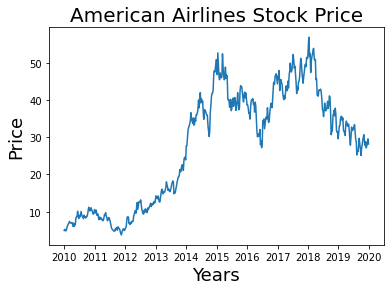

In [11]:
plot_series(AmericanAirlines_serie,'American Airlines Stock Price',xlabel='Years',ylabel='Price')

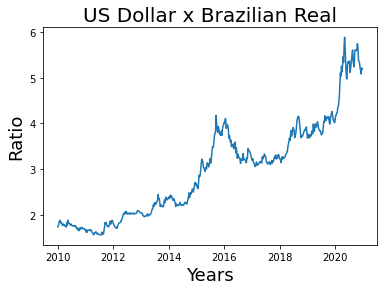

In [12]:
plot_series(USD_BRL_serie,'US Dollar x Brazilian Real',xlabel='Years',ylabel='Ratio')

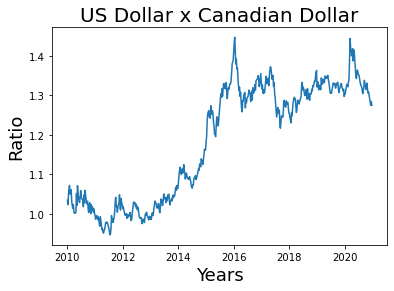

In [13]:
plot_series(USD_CAD_serie,'US Dollar x Canadian Dollar',xlabel='Years',ylabel='Ratio')

## Coments regarding the series behavior

By looking at the plots from the series, we suspect that all of them are non-stationary an non-seasonal.

We still need to get more insight on that behavior, but the visual analysis is, probably, enought.

The fact that the series are non-stationary is a problem for both ARIMA and GARCH models, so we need to make them stationary.

For the Neural Networks as weel as the other Machine Learning Models, it may not be a problem and we will discuss this in the other notebooks.

Let's get more insight on the behavior of each series.

In [16]:
adf_BRL = adfuller(USD_BRL_serie)
adf_CAD = adfuller(USD_CAD_serie)
adf_American = adfuller(AmericanAirlines_serie)


print('American',adf_American)
print('USD/BRL',adf_BRL)
print('USD/CAD',adf_CAD)

American (-1.581559286037242, 0.49284992339569844, 30, 3617, {'1%': -3.4321592195007473, '5%': -2.8623394121216172, '10%': -2.5671955395660633}, -6581.801132369459)
USD/BRL (0.0914938467581399, 0.9654755180243878, 31, 3980, {'1%': -3.4319941011564126, '5%': -2.862266473956485, '10%': -2.567156709994697}, -31793.607807569053)
USD/CAD (-1.1605388267606251, 0.6903365234231755, 31, 3980, {'1%': -3.4319941011564126, '5%': -2.862266473956485, '10%': -2.567156709994697}, -45622.96792904435)


We want to look at the second value in those prints. This is the **p-value**, that, if **less than 0.05**, means we have rejected the **Null Hypothesis** and the series is stationary.

None of our series, as suggested before, is stationary.

## Creating a stationary series

In order to make our series stationary, we will differenciate them, as follows.

In [17]:
USD_BRL_serie_diff1 = USD_BRL_serie - USD_BRL_serie.shift(1)
USD_CAD_serie_diff1 = USD_CAD_serie - USD_CAD_serie.shift(1)
AmericanAirlines_serie_diff1 = AmericanAirlines_serie - AmericanAirlines_serie.shift(1)

#We need to drop NaN values because at least one is always created -> the first value of the new differenciated series
USD_BRL_serie_diff1 = USD_BRL_serie_diff1.dropna()
USD_CAD_serie_diff1 = USD_CAD_serie_diff1.dropna()
AmericanAirlines_serie_diff1 = AmericanAirlines_serie_diff1.dropna()

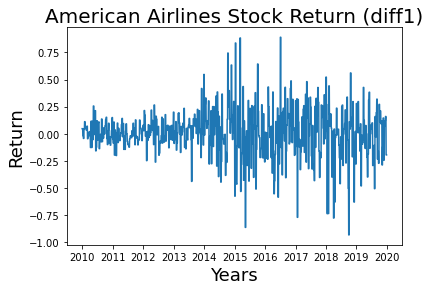

In [18]:
plot_series(AmericanAirlines_serie_diff1,'American Airlines Stock Return (diff1)',xlabel='Years',ylabel='Return')

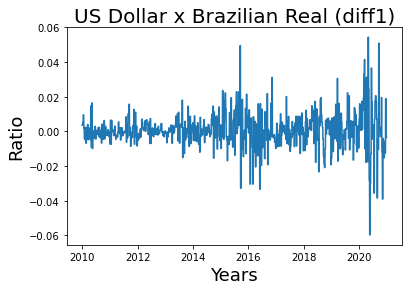

In [19]:
plot_series(USD_BRL_serie_diff1,'US Dollar x Brazilian Real (diff1)',xlabel='Years',ylabel='Ratio')

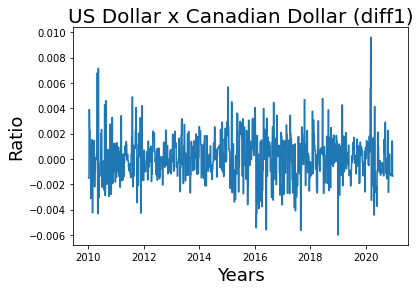

In [20]:
plot_series(USD_CAD_serie_diff1,'US Dollar x Canadian Dollar (diff1)',xlabel='Years',ylabel='Ratio')

Let's check stationarity again with the ADF-Test

In [21]:
adf_BRL = adfuller(USD_BRL_serie_diff1)
adf_CAD = adfuller(USD_CAD_serie_diff1)
adf_American = adfuller(AmericanAirlines_serie_diff1)


print('USD/BRL',adf_BRL)
print('USD/CAD',adf_CAD)
print('American',adf_American)

USD/BRL (-10.62196811337906, 5.485997467375631e-19, 31, 3979, {'1%': -3.4319945146179958, '5%': -2.8622666566010153, '10%': -2.5671568072270095}, -31787.697838463624)
USD/CAD (-10.237953160116335, 4.833285239686073e-18, 31, 3979, {'1%': -3.4319945146179958, '5%': -2.8622666566010153, '10%': -2.5671568072270095}, -45611.81999616622)
American (-10.504977468218257, 1.0600240666952068e-18, 30, 3616, {'1%': -3.432159720193857, '5%': -2.862339633287972, '10%': -2.56719565730786}, -6579.671861244398)


## Stationarity Results

Now all of out series are stationary.

It took 1 difference for **USD/CAD**, **American Airlines** and **USD/BRL**.

That information is important for the **ARIMA** and **GARCH** models.

## Seasonality Analysis

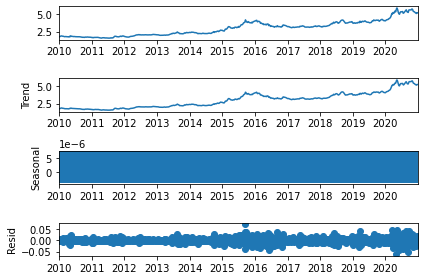

In [23]:
seasonal_decompose(USD_BRL_serie).plot();

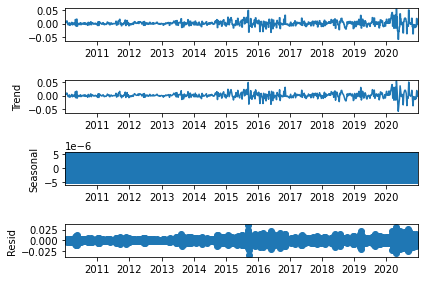

In [24]:
seasonal_decompose(USD_BRL_serie_diff1).plot();

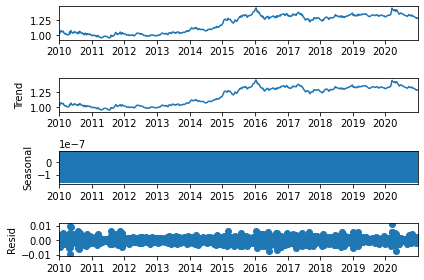

In [25]:
seasonal_decompose(USD_CAD_serie).plot();

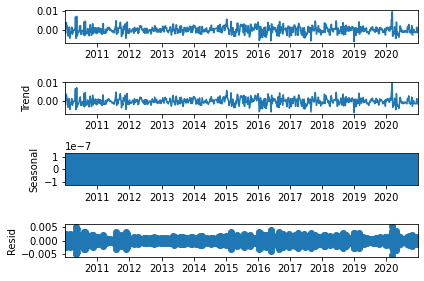

In [26]:
seasonal_decompose(USD_CAD_serie_diff1).plot();

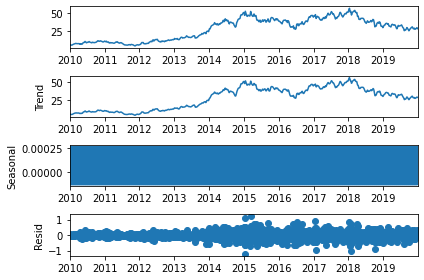

In [27]:
seasonal_decompose(AmericanAirlines_serie).plot();

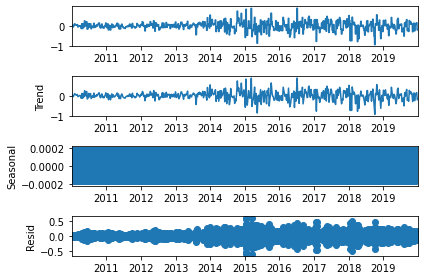

In [28]:
seasonal_decompose(AmericanAirlines_serie_diff1).plot();

## Conclusion regarding seasonality

Any of the series, neither the original ones, nor the differentiate ones, is seasonal.

## Correlation Analysis

The next step in out Time Series Analysis should be to create the **Autocorrelation and Partial Autocorrelation Functions**, in order to determine the parameters of the **ARIMA Model** and **GARCH Model**.


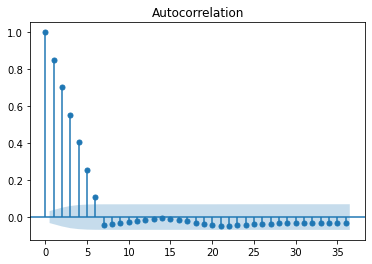

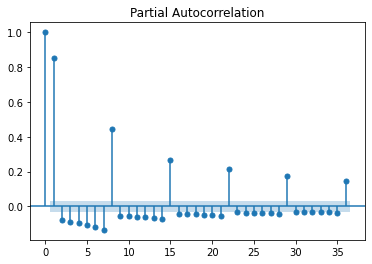

In [29]:
acf_American_diff1 = plot_acf(AmericanAirlines_serie_diff1)
pacf_American_diff1 = plot_pacf(AmericanAirlines_serie_diff1)

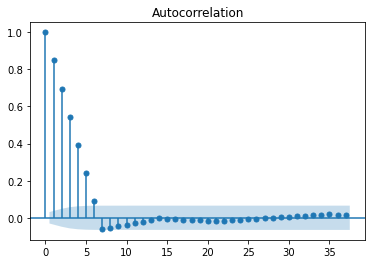

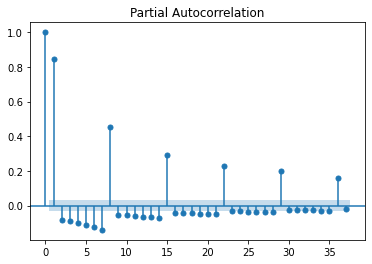

In [30]:
acf_USD_CAD_diff1 = plot_acf(USD_CAD_serie_diff1)
Pacf_USD_CAD_diff1 = plot_pacf(USD_CAD_serie_diff1)

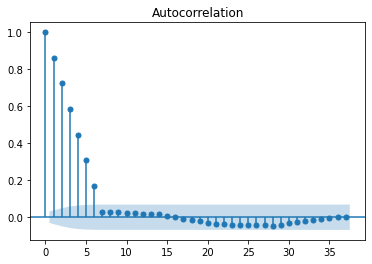

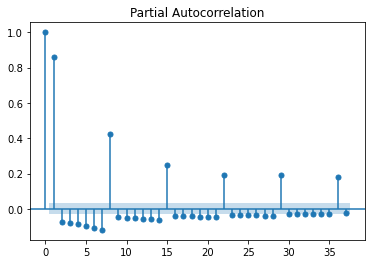

In [31]:
acf_USD_BRL_diff1 = plot_acf(USD_BRL_serie_diff1)
Pacf_USD_BRL_diff1 = plot_pacf(USD_BRL_serie_diff1)

## Correlation Results

The PACF of all series have a important spike in lag-1 while the lag-6 is the last significant lag value in the ACF of all series. So the order of the **ARIMA** Model must be (1,d,6) and for the **GARCH** Model, (1,6)